<a href="https://colab.research.google.com/github/RiniPaul86/Assignments_EDA/blob/main/IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IPL - Data Analysis

###Problem Statement
#####You are tasked with conducting a comprehensive analysis of the Indian Premier League (IPL) dataset. The analysis should cover various aspects such as the number of matches played in each season, runs scored, toss-related statistics, team performance, player statistics, and more.


###Dataset Information
#####The Indian Premier League (IPL) a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was 475 billion (US$6.7 billion)

In [91]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
df1 = pd.read_csv("/content/IPL_Matches_2008_2020.csv")
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


#Data Info and data cleaning for df1

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [94]:
df1.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [95]:
#dropping the column 'method' since there are many missing values in it and also we cannot extract the value from the available dataset.
df1 = df1.drop(['method'],axis = 1)

In [96]:
# filling the missing value in result margin with median
med1 = df1['result_margin'].median()
print(med1)

8.0


In [97]:
df1['result_margin'] = df1['result_margin'].fillna(med1)

In [98]:
#selecting rows with missing values in the 'city' column
target_column = 'city'
missing_values_target_column = df1[df1[target_column].isnull()]
print(f"\nRows with missing values in the '{target_column}' column:")
missing_values_target_column.head()


Rows with missing values in the 'city' column:


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,M Erasmus,S Ravi


In [99]:
#copying city from venue
source_column1 = 'venue'# Specify the source and target columns
target_column1 = 'city'
df1[target_column1] = df1[target_column1].fillna(df1[source_column1].str.extract(r'(\w+)', expand=False)) # Extract the source column part and fill missing values in the target column

In [100]:
# checking the correction made
selected_rows = df1.iloc[399:407] # Rows 401 to 406
selected_rows.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
399,729281,Sharjah,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,Aleem Dar,S Ravi
400,729283,Abu Dhabi,2014-04-18,GJ Maxwell,Sheikh Zayed Stadium,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Kings XI Punjab,wickets,6.0,N,RK Illingworth,C Shamshuddin
401,729285,Abu Dhabi,2014-04-18,AM Rahane,Sheikh Zayed Stadium,1,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,BF Bowden,RK Illingworth
402,729287,Dubai,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,Aleem Dar,AK Chaudhary
403,729289,Dubai,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,Aleem Dar,VA Kulkarni
404,729291,Sharjah,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,BF Bowden,M Erasmus
405,729293,Abu Dhabi,2014-04-21,SK Raina,Sheikh Zayed Stadium,1,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,runs,93.0,N,RK Illingworth,C Shamshuddin
406,729295,Sharjah,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,M Erasmus,S Ravi


In [101]:
#dropping the rows since same set of rows have null values for player_of_match,winner,result & eliminator. validated after checking
rows_to_drop = [241, 486, 511, 744]
df1 = df1.drop(rows_to_drop, axis=0)

In [102]:
df1.isnull().sum() # data cleaned for df1

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

# Data Info and data cleaning for df2

In [103]:
df2 = pd.read_csv("/content/IPL_BallbyBall _2008_2020.csv")
df2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [104]:
df2.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [105]:
df2.shape

(193468, 18)

In [106]:
#selecting rows with missing values in the 'bowling team' column
target_column2 = 'bowling_team'
missing_values_target_column2 = df2[df2[target_column2].isnull()]
print(f"\nRows with missing values in the '{target_column2}' column:")
missing_values_target_column2.head(200)


Rows with missing values in the 'bowling_team' column:


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,0,1,1,0,0,NaN,NaN,NaN,legbyes,Delhi Daredevils,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Daredevils,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115654,829763,1,7,3,AB de Villiers,Mandeep Singh,STR Binny,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115655,829763,1,8,6,AB de Villiers,Mandeep Singh,SR Watson,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115656,829763,1,9,1,Mandeep Singh,AB de Villiers,STR Binny,4,0,4,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN
115657,829763,1,8,4,AB de Villiers,Mandeep Singh,SR Watson,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,NaN


In [107]:
unique_values =missing_values_target_column2['id'].unique()
print("Unique values in the column:", unique_values)

Unique values in the column: [501265 829763]


In [108]:
#501265 Pune Warriors
#829763 Rajasthan Royals #by inspection and assigned the values in missing cell

In [109]:
df2.loc[(df2.bowling_team.isnull())&(df2.id== 501265),'bowling_team']= 'Pune Warriors'
df2.loc[(df2.bowling_team.isnull())&(df2.id== 829763),'bowling_team']= 'Rajasthan Royals'

In [110]:
#dropping the column 'method' since there are many missing values in it and also we cannot extract the value from the available dataset.
df2 = df2.drop(['dismissal_kind','player_dismissed','fielder','extras_type'],axis = 1)

In [111]:
df2.isnull().sum()

id              0
inning          0
over            0
ball            0
batsman         0
non_striker     0
bowler          0
batsman_runs    0
extra_runs      0
total_runs      0
non_boundary    0
is_wicket       0
batting_team    0
bowling_team    0
dtype: int64

#1. What was the count of matches played in each season?

In [112]:
# adding a feature called season fron the date column
df1['date'] = pd.to_datetime(df1['date'])
df1['season'] = df1['date'].dt.year
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [113]:
df1['season'].value_counts()

2013    76
2012    74
2011    72
2010    60
2014    60
2016    60
2018    60
2020    60
2017    59
2019    59
2008    58
2009    57
2015    57
Name: season, dtype: int64

#2. How many runs were scored in each season?


In [114]:
merged_df = pd.merge(df2, df1, on='id', how='left')# Merge df1 and df2 on the 'id' column
df2['season'] = merged_df['season']# Extract the 'season' column from the merged DataFrame
df2.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008.0
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008.0
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008.0
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008.0
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,2008.0


In [115]:
df2_grp = df2.groupby(['season'])
df2_grp[['total_runs']].sum()

,total_runs
season,
2008.0,17937
2009.0,16320
2010.0,18864
2011.0,21098
2012.0,22453
2013.0,22541
2014.0,18909
2015.0,17943
2016.0,18862


<Axes: xlabel='season'>

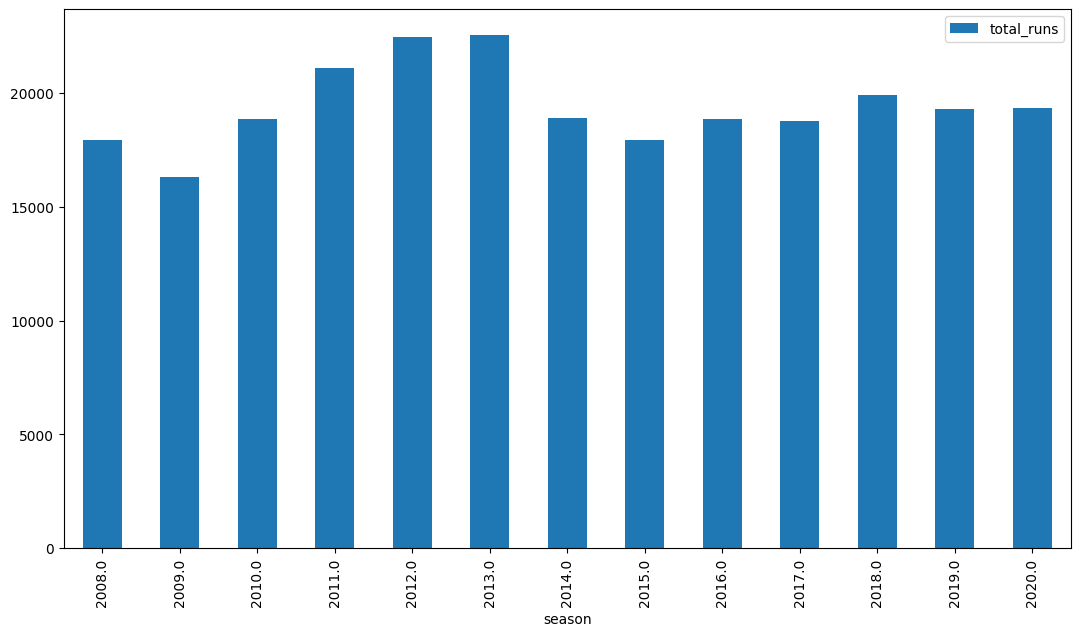

In [116]:
df2_grp[['total_runs']].sum().plot.bar(figsize = (13,7))

#3. What were the runs scored per match in different seasons?

In [117]:
df2_grp = df2.groupby(['season','id'])
df2_grp[['total_runs']].sum()

total_runs
season id                 
2008.0 335982          304
       335983          447
       335984          261
       335985          331
       335986          222
...                    ...
2020.0 1216547         402
       1237177         343
       1237178         263
       1237180         361
       1237181         313

[812 rows x 1 columns]

#4. Who has umpired the most?


In [118]:

u1 = df1['umpire1'].value_counts()
u1


HDPK Dharmasena          77
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
BF Bowden                37
S Ravi                   37
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
VA Kulkarni              19
BNJ Oxenford             16
JD Cloete                15
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
S Das                    10
MR Benson                10
K Hariharan              10
SS Hazare                10
DJ Harper                 9
CK Nandan                 8
UV Gandhe                 7
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
SJ Davis                  6
VK Sharma                 6
SD Fry              

In [119]:
u2 = df1['umpire2'].value_counts()
u2

S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          40
Nitin Menon        37
BNJ Oxenford       32
VA Kulkarni        31
AK Chaudhary       31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
RK Illingworth     18
DJ Harper          18
HDPK Dharmasena    16
NJ Llong           15
CB Gaffaney        13
SL Shastri         13
K Srinath          13
K Hariharan        11
S Asnani           11
A Nand Kishore     11
BR Doctrove         8
IL Howell           7
A Deshmukh          7
PG Pathak           6
AL Hill             6
SS Hazare           6
I Shivram           6
GA Pratapkumar      6
S Das               5
TH Wijewardene      5
K Srinivasan        5
YC Barde            5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
SD Ranade           2
MR Benson           2
JD Cloete           1
Subroto Das         1
SJ Davis  

In [120]:
umpire_num_matches = pd.concat((u1,u2),axis=1).sum(axis=1)
umpire_num_matches

HDPK Dharmasena           93.0
AK Chaudhary              87.0
Asad Rauf                 51.0
M Erasmus                 65.0
Aleem Dar                 38.0
BF Bowden                 37.0
S Ravi                   121.0
BR Doctrove               42.0
CB Gaffaney               47.0
KN Ananthapadmanabhan     33.0
AY Dandekar               28.0
C Shamshuddin             82.0
NJ Llong                  36.0
Nitin Menon               57.0
RE Koertzen               41.0
S Asnani                  30.0
VA Kulkarni               50.0
BNJ Oxenford              48.0
JD Cloete                 16.0
YC Barde                  19.0
A Nand Kishore            25.0
BG Jerling                17.0
RK Illingworth            31.0
S Das                     15.0
MR Benson                 12.0
K Hariharan               21.0
SS Hazare                 16.0
DJ Harper                 27.0
CK Nandan                 57.0
UV Gandhe                  7.0
IL Howell                 14.0
GAV Baxter                 7.0
RM Deshp

In [121]:
umpire_most_no_of_matches = umpire_num_matches.idxmax()
no_of_matches= umpire_num_matches.max()

print("umpire played in the most no of matches:", umpire_most_no_of_matches )
print("No of matches:", no_of_matches)

umpire played in the most no of matches: S Ravi
No of matches: 121.0


#5. Which team has won the most tosses?


In [122]:
tosswin = df1['toss_winner'].value_counts()
tosswin

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     86
Rajasthan Royals                85
Kings XI Punjab                 85
Delhi Daredevils                79
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [123]:
team_most_toss = tosswin.idxmax()
no_of_toss= tosswin.max()

print("team that has won the most tosses :", team_most_toss  )
print("No of times:", no_of_toss)

team that has won the most tosses : Mumbai Indians
No of times: 106


#6. What does the team decide after winning the toss?


In [124]:
df_toss1 = df1.groupby(['toss_decision', 'toss_winner']).size()
df_toss1

toss_decision  toss_winner                
bat            Chennai Super Kings            51
               Deccan Chargers                24
               Delhi Capitals                  7
               Delhi Daredevils               28
               Gujarat Lions                   1
               Kings XI Punjab                27
               Kochi Tuskers Kerala            3
               Kolkata Knight Riders          34
               Mumbai Indians                 48
               Pune Warriors                  11
               Rajasthan Royals               34
               Rising Pune Supergiants         3
               Royal Challengers Bangalore    24
               Sunrisers Hyderabad            24
field          Chennai Super Kings            46
               Deccan Chargers                19
               Delhi Capitals                 13
               Delhi Daredevils               51
               Gujarat Lions                  14
               Kings XI Pu

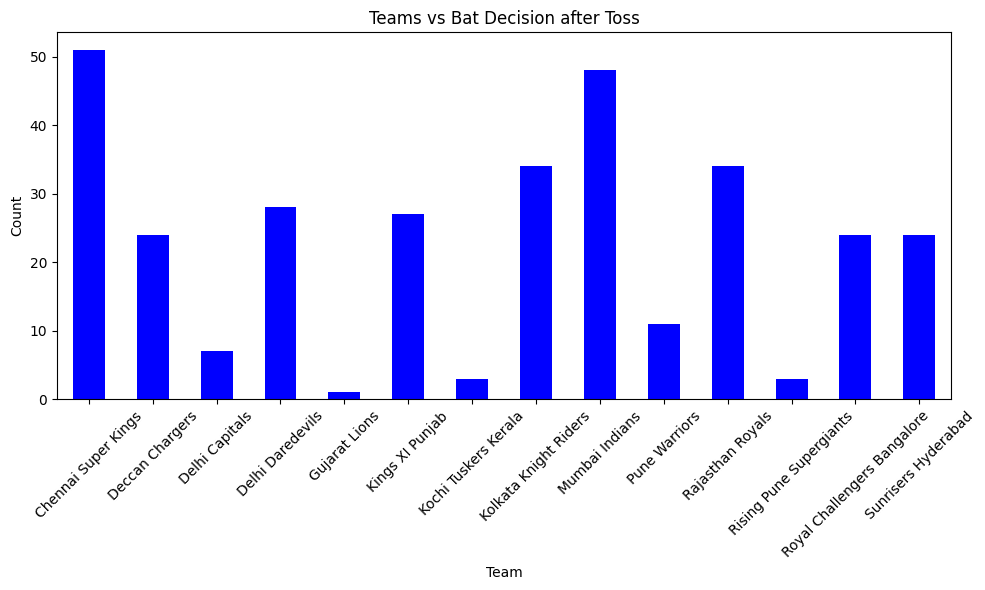

In [125]:
# Plotting for 'bat'
df_toss1['bat'].plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Teams vs Bat Decision after Toss')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

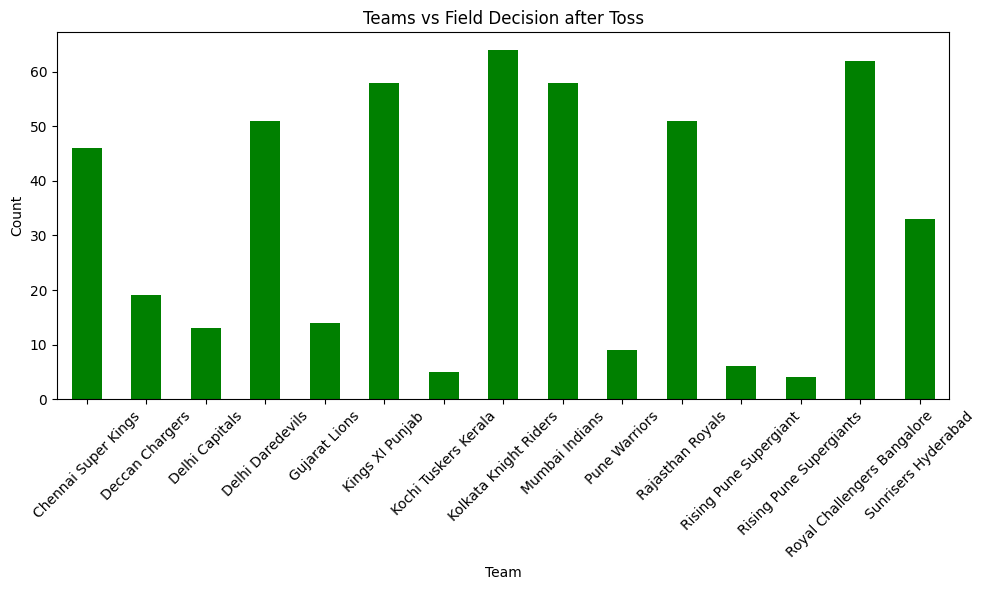

In [126]:
# Plotting for 'field'
df_toss1['field'].plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Teams vs Field Decision after Toss')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#7. How does the toss decision vary across seasons?

In [127]:
pd.crosstab([df1.toss_winner],[df1.season,df1.toss_decision],margins=True).style.background_gradient(cmap='summer_r')

#8. Does winning the toss imply winning the game?

In [128]:
pd.crosstab([df1.toss_winner],[df1.winner],margins=True).style.background_gradient(cmap='summer_r')

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,All
toss_winner,,,,,,,,,,,,,,,,
Chennai Super Kings,61,1,2,4,0,5,0,4,7,1,5,0,0,5,2,97
Deccan Chargers,2,19,0,5,0,3,0,3,4,1,3,0,0,3,0,43
Delhi Capitals,2,0,10,0,0,2,0,1,3,0,0,0,0,0,2,20
Delhi Daredevils,5,0,0,35,1,7,0,5,9,1,7,0,0,5,4,79
Gujarat Lions,0,0,0,0,10,2,0,0,1,0,0,0,0,2,0,15
Kings XI Punjab,4,2,1,3,0,36,0,8,7,2,6,0,1,7,8,85
Kochi Tuskers Kerala,0,1,0,0,0,0,4,0,0,1,0,0,0,2,0,8
Kolkata Knight Riders,6,1,1,5,0,6,2,55,9,1,4,0,0,3,5,98
Mumbai Indians,5,0,1,6,0,10,0,3,61,1,4,2,1,7,5,106


#9. How many times has the chasing team won the match?

In [129]:
# Create a function to determine the chasing team in df1
def determine_chasing_team(row):
    if row['team1'] == row['toss_winner']:
        return row['team2']
    else:
        return row['team1']
df1['chasing_team'] = df1.apply(determine_chasing_team, axis=1)# Apply the function to create the 'chasing_team' column
df1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season,chasing_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,Kolkata Knight Riders
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008,Kings XI Punjab
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008,Delhi Daredevils
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008,Royal Challengers Bangalore
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008,Kolkata Knight Riders


In [130]:
count_winner_matches_chasing_team = (df1['winner'] == df1['chasing_team']).sum()# Count occurrences where 'winner' column matches 'chasing_team' column
print("Count of matches where 'winner' column matches 'chasing_team' column:", count_winner_matches_chasing_team)

Count of matches where 'winner' column matches 'chasing_team' column: 394


#10. Which all teams had won this tournament?

In [131]:
crosstab_df = pd.crosstab([df1.winner],[df1.season],margins=True).style.background_gradient(cmap='summer_r')# Assuming crosstab_df is your Styled DataFrame with 'winner' and 'season' columns
# Create crosstab with counts and style it
crosstab_df

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
winner,,,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10,6,106
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0,0,29
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10,9,19
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0,0,67
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0,0,13
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6,6,88
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0,0,6
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6,7,99
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11,11,120


In [132]:
crosstab_df_unstyled = crosstab_df.data# Convert Styler object back to DataFrame
highest_values_by_season = crosstab_df_unstyled.iloc[:-1, :-1].idxmax()# Extract the column name (season) with the highest value for each season
highest_counts = crosstab_df_unstyled.iloc[:-1, :-1].max()# Extract the highest value for each season
result_df = pd.DataFrame({'Season': highest_values_by_season, 'Highest_Count': highest_counts})# Combine the results into a DataFrame

print("Highest value and corresponding winner by season:")
print(result_df)

Highest value and corresponding winner by season:
                       Season  Highest_Count
season                                      
2008         Rajasthan Royals             13
2009         Delhi Daredevils             10
2010           Mumbai Indians             11
2011      Chennai Super Kings             11
2012    Kolkata Knight Riders             12
2013           Mumbai Indians             13
2014          Kings XI Punjab             12
2015      Chennai Super Kings             10
2016      Sunrisers Hyderabad             11
2017           Mumbai Indians             12
2018      Chennai Super Kings             11
2019           Mumbai Indians             11
2020           Mumbai Indians             11


#11. Which team has played the most number of matches?


In [133]:
t1 = df1['team1'].value_counts()
t1

Royal Challengers Bangalore    105
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                82
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Name: team1, dtype: int64

In [134]:
t2 = df1['team2'].value_counts()
t2

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                89
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                77
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   22
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team2, dtype: int64

In [135]:
most_num_matches = pd.concat((t1,t2),axis=1).sum(axis=1)
most_num_matches

Royal Challengers Bangalore    192
Mumbai Indians                 203
Kolkata Knight Riders          192
Chennai Super Kings            178
Kings XI Punjab                190
Delhi Daredevils               159
Rajasthan Royals               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Delhi Capitals                  33
Gujarat Lions                   30
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Rising Pune Supergiant          16
dtype: int64

In [136]:
team_most_times = most_num_matches.idxmax()
no_of_times= most_num_matches.max()

print("team that has played the most number of matches :", team_most_times  )
print("No of times:", no_of_times)

team that has played the most number of matches : Mumbai Indians
No of times: 203


#12. Which team has won the most number of times?

In [137]:
winner = df1['winner'].value_counts()
winner

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [138]:
team_with_highest_wins = winner.idxmax()
highest_win_count = winner.max()

print("Team with the highest wins:", team_with_highest_wins)
print("Number of wins:", highest_win_count)

Team with the highest wins: Mumbai Indians
Number of wins: 120


#13. Which team has the highest winning percentage?

In [139]:
total_matches_played = df1['team1'].value_counts() + df1['team2'].value_counts()# Calculate the total number of matches played by each team
total_matches_played

Chennai Super Kings            178
Deccan Chargers                 75
Delhi Capitals                  33
Delhi Daredevils               159
Gujarat Lions                   30
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          192
Mumbai Indians                 203
Pune Warriors                   45
Rajasthan Royals               159
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    192
Sunrisers Hyderabad            124
dtype: int64

In [140]:
total_wins = df1['winner'].value_counts()
winning_percentage = (total_wins / total_matches_played) * 100 # Calculate the winning percentage for each team
team_with_highest_percentage = winning_percentage.idxmax() # Find the team with the highest winning percentage
highest_percentage = winning_percentage.max()

print("Team with the highest winning percentage:", team_with_highest_percentage)
print("Winning percentage:", highest_percentage)

Team with the highest winning percentage: Rising Pune Supergiant
Winning percentage: 62.5


#14. Is there any lucky venue for a particular team?

In [141]:
pd.crosstab([df1.venue],[df1.winner],margins=True).style.background_gradient(cmap='summer_r')

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,All
venue,,,,,,,,,,,,,,,,
Barabati Stadium,0,3,0,0,0,1,0,3,0,0,0,0,0,0,0,7
Brabourne Stadium,1,0,0,0,0,0,0,0,6,0,2,0,0,1,1,11
Buffalo Park,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3
De Beers Diamond Oval,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,3
Dr DY Patil Sports Academy,3,2,0,1,0,0,0,2,5,2,1,0,0,1,0,17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,2,0,1,1,0,1,0,0,2,0,1,0,2,0,3,13
Dubai International Cricket Stadium,6,0,4,1,0,5,0,2,3,0,1,0,0,5,6,33
Eden Gardens,5,0,1,1,2,3,1,45,10,0,2,1,0,4,2,77
Feroz Shah Kotla,6,2,4,27,1,5,1,5,4,1,4,0,1,6,6,73


#15. Innings wise comparison between teams

In [142]:
# Group the DataFrame by 'inning' and 'batting_team' and aggregate relevant statistics
innings_comparison = df2.groupby(['inning', 'batting_team']).agg({
    'total_runs': 'sum',            # Total runs scored
    'is_wicket': 'sum',             # Total wickets taken
    # Add more statistics as needed
})

# Reset the index to make the DataFrame easier to work with
innings_comparison.reset_index(inplace=True)

# Pivot the DataFrame to reshape it for better comparison
innings_comparison_pivot = innings_comparison.pivot(index='batting_team', columns='inning')

# Display the innings-wise comparison between teams
print("Innings-wise comparison between teams:")
print(innings_comparison_pivot)

Innings-wise comparison between teams:
                            total_runs        is_wicket     
inning                               1      2         1    2
batting_team                                                
Chennai Super Kings              15344  13019       484  434
Deccan Chargers                   6765   4698       278  206
Delhi Capitals                    2860   2436       103  109
Delhi Daredevils                 11247  13038       442  508
Gujarat Lions                     2267   2589       100   88
Kings XI Punjab                  15710  14307       629  522
Kochi Tuskers Kerala              1009    892        51   35
Kolkata Knight Riders            14842  14541       576  529
Mumbai Indians                   18338  13948       667  522
Pune Warriors                     2973   3385       125  173
Rajasthan Royals                 11236  13271       447  506
Rising Pune Supergiant            1304   1166        48   42
Rising Pune Supergiants           1123    940 

#16. Which team has scored the most number of 200+ scores?


In [143]:
df2_grp1 = df2.groupby(['id','batting_team'])
df2_grp_totalruns = df2_grp1[['total_runs']].sum()
df2_grp_totalruns

total_runs
id      batting_team                           
335982  Kolkata Knight Riders               222
        Royal Challengers Bangalore          82
335983  Chennai Super Kings                 240
        Kings XI Punjab                     207
335984  Delhi Daredevils                    132
...                                         ...
1237178 Sunrisers Hyderabad                 132
1237180 Delhi Capitals                      189
        Sunrisers Hyderabad                 172
1237181 Delhi Capitals                      156
        Mumbai Indians                      157

[1630 rows x 1 columns]

In [144]:
filtered_df2_grp_totalruns = df2_grp_totalruns[df2_grp_totalruns['total_runs'] > 200]
filtered_df2_grp_totalruns

total_runs
id      batting_team                           
335982  Kolkata Knight Riders               222
335983  Chennai Super Kings                 240
        Kings XI Punjab                     207
335989  Chennai Super Kings                 208
        Mumbai Indians                      202
...                                         ...
1216527 Rajasthan Royals                    226
1216538 Mumbai Indians                      208
1216542 Sunrisers Hyderabad                 201
1216547 Mumbai Indians                      201
        Royal Challengers Bangalore         201

[98 rows x 1 columns]

In [145]:
team_occurrences = filtered_df2_grp_totalruns.index.get_level_values('batting_team').value_counts() # Count occurrences of each 'batting_team' in the filtered DataFrame

print("Occurrences of each 'batting_team':")
print(team_occurrences)

Occurrences of each 'batting_team':
Royal Challengers Bangalore    17
Chennai Super Kings            15
Kings XI Punjab                14
Mumbai Indians                 13
Sunrisers Hyderabad            12
Kolkata Knight Riders           9
Rajasthan Royals                9
Delhi Daredevils                5
Delhi Capitals                  2
Deccan Chargers                 1
Gujarat Lions                   1
Name: batting_team, dtype: int64


# 17.Which team has conceded 200+ scores the most?

#18. What was the highest run scored by a team in a single match?

In [146]:
df2_grp_totalruns

total_runs
id      batting_team                           
335982  Kolkata Knight Riders               222
        Royal Challengers Bangalore          82
335983  Chennai Super Kings                 240
        Kings XI Punjab                     207
335984  Delhi Daredevils                    132
...                                         ...
1237178 Sunrisers Hyderabad                 132
1237180 Delhi Capitals                      189
        Sunrisers Hyderabad                 172
1237181 Delhi Capitals                      156
        Mumbai Indians                      157

[1630 rows x 1 columns]

In [147]:
highest_total_runs = df2_grp_totalruns['total_runs'].max()

highest_total_runs_row = df2_grp_totalruns[df2_grp_totalruns['total_runs'] == highest_total_runs]
team_with_highest_score = highest_total_runs_row.index.get_level_values('batting_team').tolist()[0]

print("Team with highest score:", team_with_highest_score)
print("Highest total runs:", highest_total_runs)

Team with highest score: Royal Challengers Bangalore
Highest total runs: 263


#19. Which is the biggest win in terms of run margin?

#20. Which batsmen have played the most number of balls?

In [148]:
batsman_most_balls = df2['batsman'].value_counts()
batsman_most_balls


V Kohli           4609
S Dhawan          4208
RG Sharma         4088
SK Raina          4041
DA Warner         3819
                  ... 
DP Vijaykumar        1
V Pratap Singh       1
Sunny Gupta          1
JL Denly             1
U Kaul               1
Name: batsman, Length: 537, dtype: int64

In [149]:
batsman_most_no_of_balls = batsman_most_balls.idxmax()
no_of_balls = batsman_most_balls.max()

print("Batsman played the most no of balls:", batsman_most_no_of_balls)
print("No of balls:", no_of_balls )

Batsman played the most no of balls: V Kohli
No of balls: 4609


#21. Who are the leading run-scorers of all time?

In [150]:
# Group the DataFrame by batsman and sum the total runs scored by each batsman
total_runs_per_batsman = df2.groupby('batsman')['batsman_runs'].sum()

# Sort the batsmen based on their total runs scored in descending order
leading_run_scorers = total_runs_per_batsman.sort_values(ascending=False)

# Display the top run-scorers
print("Leading run-scorers of all time:")
print(leading_run_scorers.head(10))  # Displaying the top 10 run-scorers, you can adjust the number as needed

Leading run-scorers of all time:
batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64


#22. Who has hit the most number of 4's?

In [151]:
fours_df = df2[df2['batsman_runs'] == 4]
fours_total_runs = fours_df.groupby('batsman')['batsman_runs'].sum()
batsman_with_most_fours = fours_total_runs.idxmax()
print("Batsman with the most fours:", batsman_with_most_fours)

Batsman with the most fours: S Dhawan


#23. Who has hit the most number of 6's?

In [152]:
six_df = df2[df2['batsman_runs'] == 6]
six_total_runs = six_df.groupby('batsman')['batsman_runs'].sum()
batsman_with_most_six = six_total_runs.idxmax()
print("Batsman with the most six:", batsman_with_most_six)

Batsman with the most six: CH Gayle


#24. Who has the highest strike rate?

In [153]:
# Group the DataFrame by 'batsman' and sum the 'batsman_runs' and count the balls faced
runs_balls_per_batsman = df2.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'count'})
runs_balls_per_batsman

,batsman_runs,ball
batsman,,
A Ashish Reddy,280,196
A Chandila,4,7
A Chopra,53,75
A Choudhary,25,20
A Dananjaya,4,5
...,...,...
YV Takawale,192,183
Yashpal Singh,47,67
Younis Khan,3,7


In [154]:
# Calculate the strike rate for each batsman
runs_balls_per_batsman['strike_rate'] = (runs_balls_per_batsman['batsman_runs'] / runs_balls_per_batsman['ball']) * 100

# Identify the batsman with the highest strike rate
highest_strike_rate_batsman = runs_balls_per_batsman['strike_rate'].idxmax()
highest_strike_rate = runs_balls_per_batsman['strike_rate'].max()

# Display the batsman with the highest strike rate
print("Batsman with the highest strike rate:", highest_strike_rate_batsman)
print("Strike rate:", highest_strike_rate)

Batsman with the highest strike rate: B Stanlake
Strike rate: 250.0


#25. Who is the leading wicket-taker?

#26. Which stadium has hosted the most number of matches?

In [155]:
most_venue= df1['venue'].value_counts()
most_venue

Eden Gardens                                            77
Feroz Shah Kotla                                        73
Wankhede Stadium                                        73
Rajiv Gandhi International Stadium, Uppal               64
M Chinnaswamy Stadium                                   63
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   

In [156]:
venue_most_number = most_venue.idxmax()
no_of_times = most_venue.max()

print("stadium that has hosted the most number of matches:", venue_most_number)
print("No of times:", no_of_times)

stadium that has hosted the most number of matches: Eden Gardens
No of times: 77


#27. Who has won the most MOM awards?

In [157]:
mom = df1['player_of_match'].value_counts()
mom

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

In [158]:
mom_most_number = mom.idxmax()
no_of_times = mom.max()

print("Player who has won the most MOM awards:",mom_most_number)
print("No of times:", no_of_times)

Player who has won the most MOM awards: AB de Villiers
No of times: 23


#28. What is the count of fours hit in each season?

In [159]:
four_hit_df = df2[df2['batsman_runs'] == 4]
fours_hit_season = four_hit_df.groupby('season')['batsman_runs'].value_counts()
fours_hit_season

season  batsman_runs
2008.0  4               1703
2009.0  4               1317
2010.0  4               1708
2011.0  4               1913
2012.0  4               1911
2013.0  4               2052
2014.0  4               1562
2015.0  4               1568
2016.0  4               1633
2017.0  4               1611
2018.0  4               1652
2019.0  4               1644
2020.0  4               1583
Name: batsman_runs, dtype: int64

<Axes: xlabel='season,batsman_runs'>

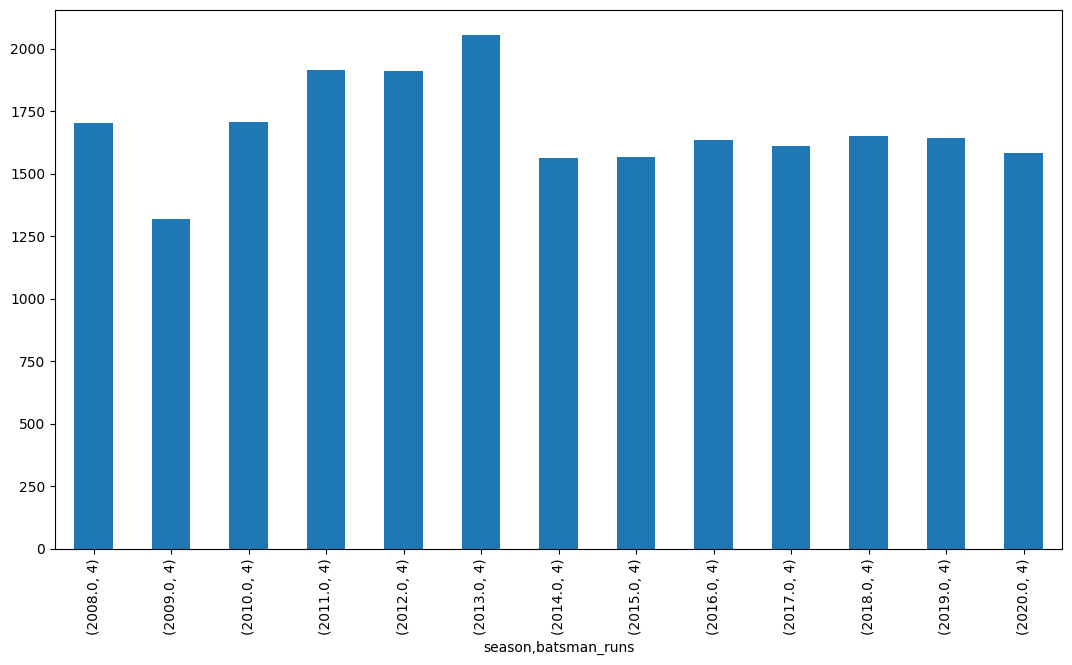

In [160]:
fours_hit_season .plot.bar(figsize = (13,7))

#29. What is the count of sixes hit in each season?

In [161]:
six_hit_df = df2[df2['batsman_runs'] == 6]
six_hit_season = six_hit_df.groupby('season')['batsman_runs'].value_counts()
six_hit_season

season  batsman_runs
2008.0  6               623
2009.0  6               506
2010.0  6               585
2011.0  6               637
2012.0  6               733
2013.0  6               675
2014.0  6               714
2015.0  6               678
2016.0  6               639
2017.0  6               705
2018.0  6               872
2019.0  6               777
2020.0  6               735
Name: batsman_runs, dtype: int64

<Axes: xlabel='season,batsman_runs'>

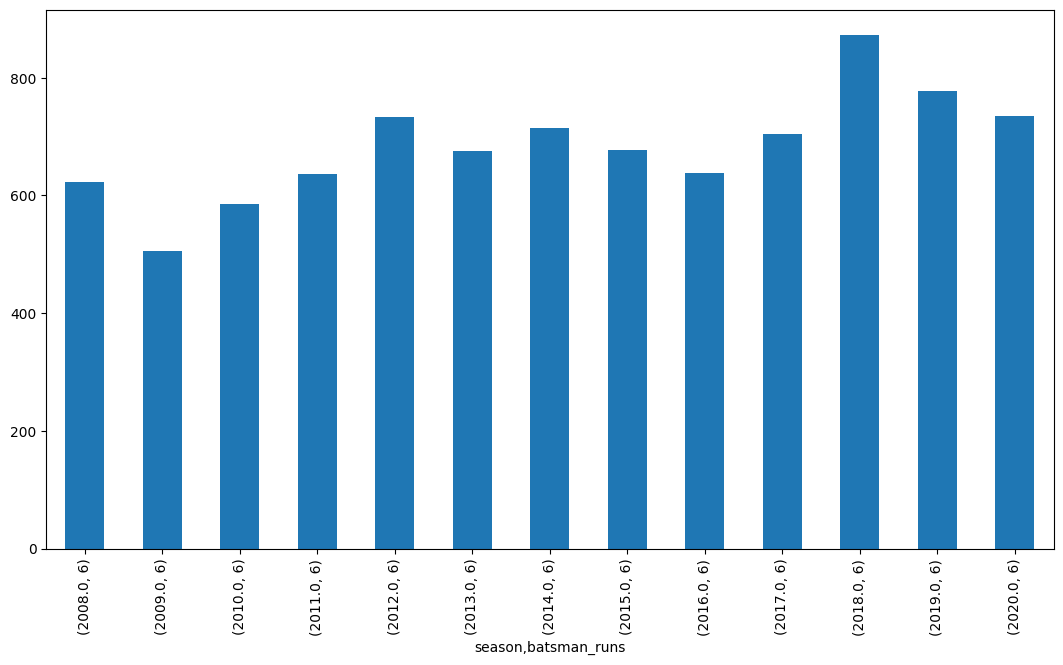

In [162]:
six_hit_season.plot.bar(figsize = (13,7))

#30. What is the count of runs scored from boundaries in each season?

In [163]:
boundary_score = df2[df2['batsman_runs'].isin([4, 6])]
boundary_score_season = boundary_score.groupby('season')['batsman_runs'].value_counts()
boundary_score_season

season  batsman_runs
2008.0  4               1703
        6                623
2009.0  4               1317
        6                506
2010.0  4               1708
        6                585
2011.0  4               1913
        6                637
2012.0  4               1911
        6                733
2013.0  4               2052
        6                675
2014.0  4               1562
        6                714
2015.0  4               1568
        6                678
2016.0  4               1633
        6                639
2017.0  4               1611
        6                705
2018.0  4               1652
        6                872
2019.0  4               1644
        6                777
2020.0  4               1583
        6                735
Name: batsman_runs, dtype: int64

#31. What is the run contribution from boundaries in each season?

In [164]:
bboundary_score = df2[df2['batsman_runs'].isin([4, 6])]
boundary_score_season = boundary_score.groupby('season')['batsman_runs'].sum()
boundary_score_season

season
2008.0    10550
2009.0     8304
2010.0    10342
2011.0    11474
2012.0    12042
2013.0    12258
2014.0    10532
2015.0    10340
2016.0    10366
2017.0    10674
2018.0    11840
2019.0    11238
2020.0    10742
Name: batsman_runs, dtype: int64

#32. Which team has scored the most runs in the first 6 overs?


In [165]:
first_six_overs = df2[df2['over'] <= 6]# Filter the DataFrame for the first six overs of each team in each match
# Group the filtered DataFrame by 'id', 'inning', and 'batting_team' and sum the 'total_runs'
first_six_overs_grouped = first_six_overs.groupby(['id', 'inning', 'batting_team'])['total_runs'].sum()
first_six_overs_grouped

id       inning  batting_team               
335982   1       Kolkata Knight Riders          68
         2       Royal Challengers Bangalore    33
335983   1       Chennai Super Kings            62
         2       Kings XI Punjab                69
335984   1       Rajasthan Royals               44
                                                ..
1237178  2       Sunrisers Hyderabad            49
1237180  1       Delhi Capitals                 76
         2       Sunrisers Hyderabad            52
1237181  1       Delhi Capitals                 46
         2       Mumbai Indians                 65
Name: total_runs, Length: 1630, dtype: int64

In [166]:
# Find the index corresponding to the maximum total score
max_score_index = first_six_overs_grouped.idxmax()

# Extract the team name and score from the index
team_with_highest_score = max_score_index[2]
highest_score = first_six_overs_grouped[max_score_index]

# Display the team name and score
print("Team with highest total score in the first six overs:", team_with_highest_score)
print("Score obtained:", highest_score)

Team with highest total score in the first six overs: Chennai Super Kings
Score obtained: 107


#33. Which team has scored the most runs in the last 4 overs?

In [167]:
# Filter the DataFrame for the first six overs of each team in each match
last_four_overs = df2[df2['over'] >= 17]

# Group the filtered DataFrame by 'id', 'inning', and 'batting_team' and sum the 'total_runs'
last_four_overs_grouped = last_four_overs.groupby(['id', 'inning', 'batting_team'])['total_runs'].sum()

In [168]:
# Find the index corresponding to the maximum total score
max_score_index = last_four_overs_grouped.idxmax()

# Extract the team name and score from the index
team_with_highest_score = max_score_index[2]
highest_score = last_four_overs_grouped[max_score_index]

# Display the team name and score
print("Team with highest total score in the first six overs:", team_with_highest_score)
print("Score obtained:", highest_score)

Team with highest total score in the first six overs: Royal Challengers Bangalore
Score obtained: 75


#34. Which team has the best scoring run-rate in the first 6 overs?

In [169]:
# Calculate the total runs scored by each team in the first 6 overs
total_runs_first_six = first_six_overs_grouped.groupby('batting_team').sum()

# Calculate the total number of overs faced by each team in the first 6 overs (assuming 6 overs per inning)
total_overs_first_six = 6

# Calculate the run-rate for each team
run_rate_first_six = total_runs_first_six / total_overs_first_six

# Identify the team with the highest run-rate
team_with_best_run_rate = run_rate_first_six.idxmax()
best_run_rate = run_rate_first_six.max()

# Display the team with the best scoring run-rate
print("Team with the best scoring run-rate in the first 6 overs:", team_with_best_run_rate)
print("Run-rate:", best_run_rate)

Team with the best scoring run-rate in the first 6 overs: Mumbai Indians
Run-rate: 1746.0


#35. Which team has the best scoring run-rate in the last 4 overs?

In [170]:
# Calculate the total runs scored by each team in the last 4 overs
total_runs_last_four = last_four_overs_grouped.groupby('batting_team').sum()

# Calculate the total number of overs faced by each team in the last 4 overs (assuming 6 overs per inning)
total_overs_last_four = 6

# Calculate the run-rate for each team
run_rate_last_four = total_runs_last_four / total_overs_last_four

# Identify the team with the highest run-rate
team_with_best_run_rate1 = run_rate_last_four.idxmax()
best_run_rate1  = run_rate_last_four.max()

# Display the team with the best scoring run-rate
print("Team with the best scoring run-rate in the last 4 overs:", team_with_best_run_rate1)
print("Run-rate:", best_run_rate1)


Team with the best scoring run-rate in the last 4 overs: Mumbai Indians
Run-rate: 951.3333333333334
